
Training and Evaluating: XGBoost
Classification Report:
                precision    recall  f1-score   support

      Analysis     0.7956    0.2037    0.3244       535
      Backdoor     0.7544    0.1845    0.2966       466
           DoS     0.4471    0.3228    0.3749      3271
      Exploits     0.6751    0.8533    0.7538      8905
       Fuzzers     0.8883    0.8055    0.8449      4849
       Generic     0.9961    0.9840    0.9900     11774
        Normal     0.9740    0.9899    0.9819     18600
Reconnaissance     0.9142    0.7770    0.8400      2798
     Shellcode     0.6322    0.6887    0.6593       302
         Worms     0.5000    0.4000    0.4444        35

      accuracy                         0.8761     51535
     macro avg     0.7577    0.6210    0.6510     51535
  weighted avg     0.8765    0.8761    0.8700     51535



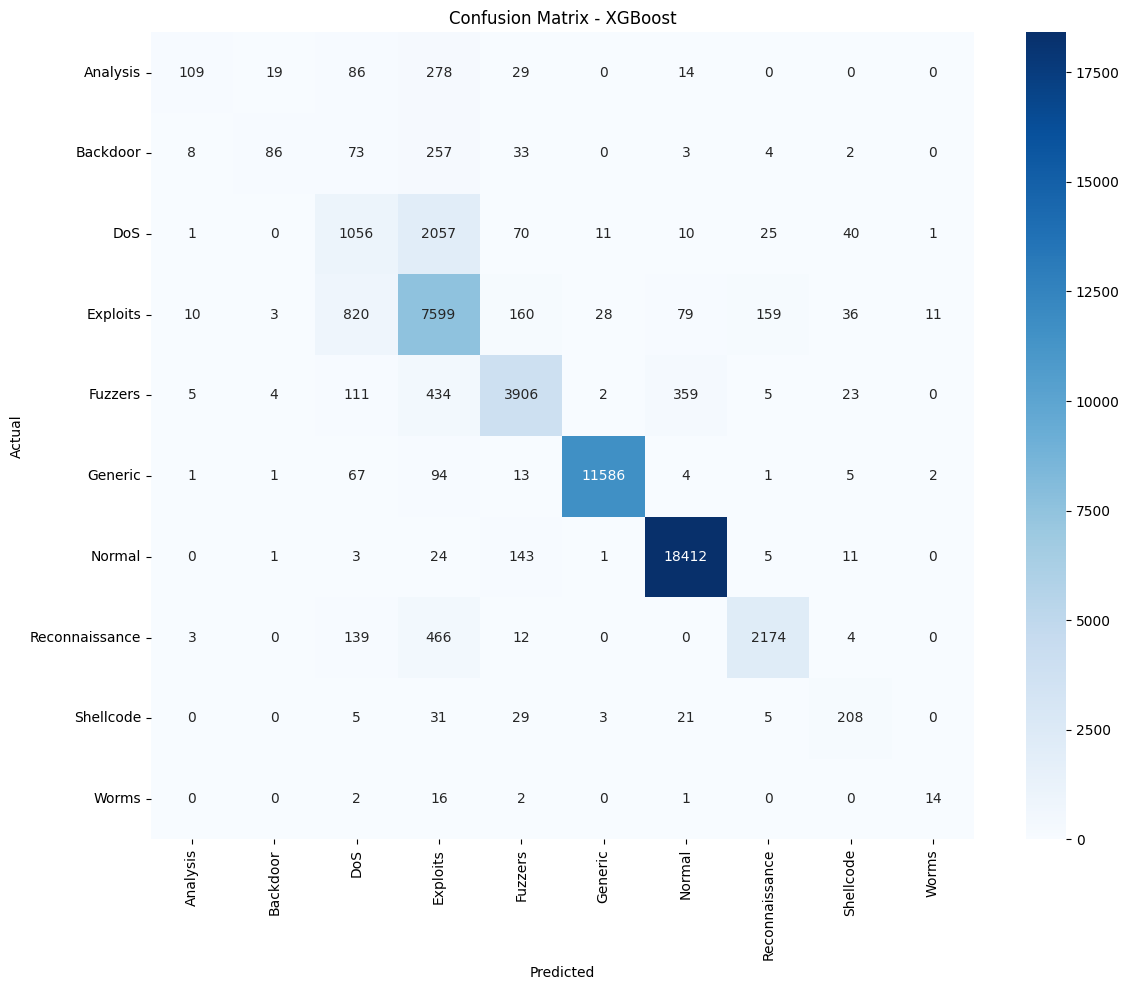


Training and Evaluating: LightGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.042587 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6290
[LightGBM] [Info] Number of data points in the train set: 206138, number of used features: 43
[LightGBM] [Info] Start training from score -4.566806
[LightGBM] [Info] Start training from score -4.706358
[LightGBM] [Info] Start training from score -2.757309
[LightGBM] [Info] Start training from score -1.755639
[LightGBM] [Info] Start training from score -2.363427
[LightGBM] [Info] Start training from score -1.476337
[LightGBM] [Info] Start training from score -1.019090
[LightGBM] [Info] Start training from score -2.913615
[LightGBM] [Info] Start training from score -5.138752
[LightGBM] [Info] Start training from score -7.301827
Classification Report:
                precision    recall  f1-score   support

      Analysis     0.3793    0.2056    0.2667       535

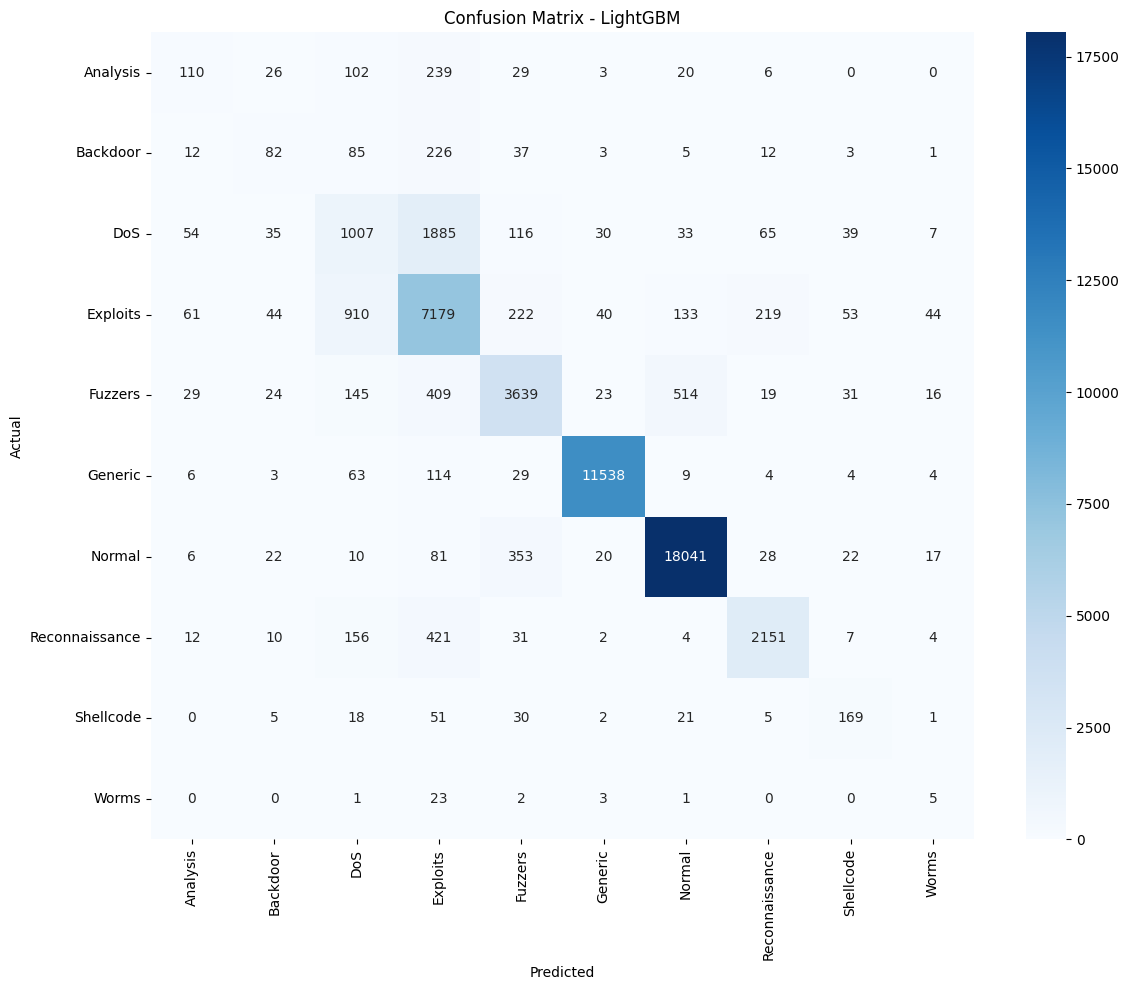


Training and Evaluating: CatBoost
Classification Report:
                precision    recall  f1-score   support

      Analysis     0.8304    0.1738    0.2875       535
      Backdoor     0.7155    0.1781    0.2852       466
           DoS     0.4025    0.2776    0.3286      3271
      Exploits     0.6640    0.8437    0.7432      8905
       Fuzzers     0.8557    0.7851    0.8189      4849
       Generic     0.9968    0.9817    0.9892     11774
        Normal     0.9651    0.9855    0.9752     18600
Reconnaissance     0.9079    0.7752    0.8363      2798
     Shellcode     0.6465    0.6358    0.6411       302
         Worms     0.6923    0.2571    0.3750        35

      accuracy                         0.8667     51535
     macro avg     0.7677    0.5894    0.6280     51535
  weighted avg     0.8655    0.8667    0.8593     51535



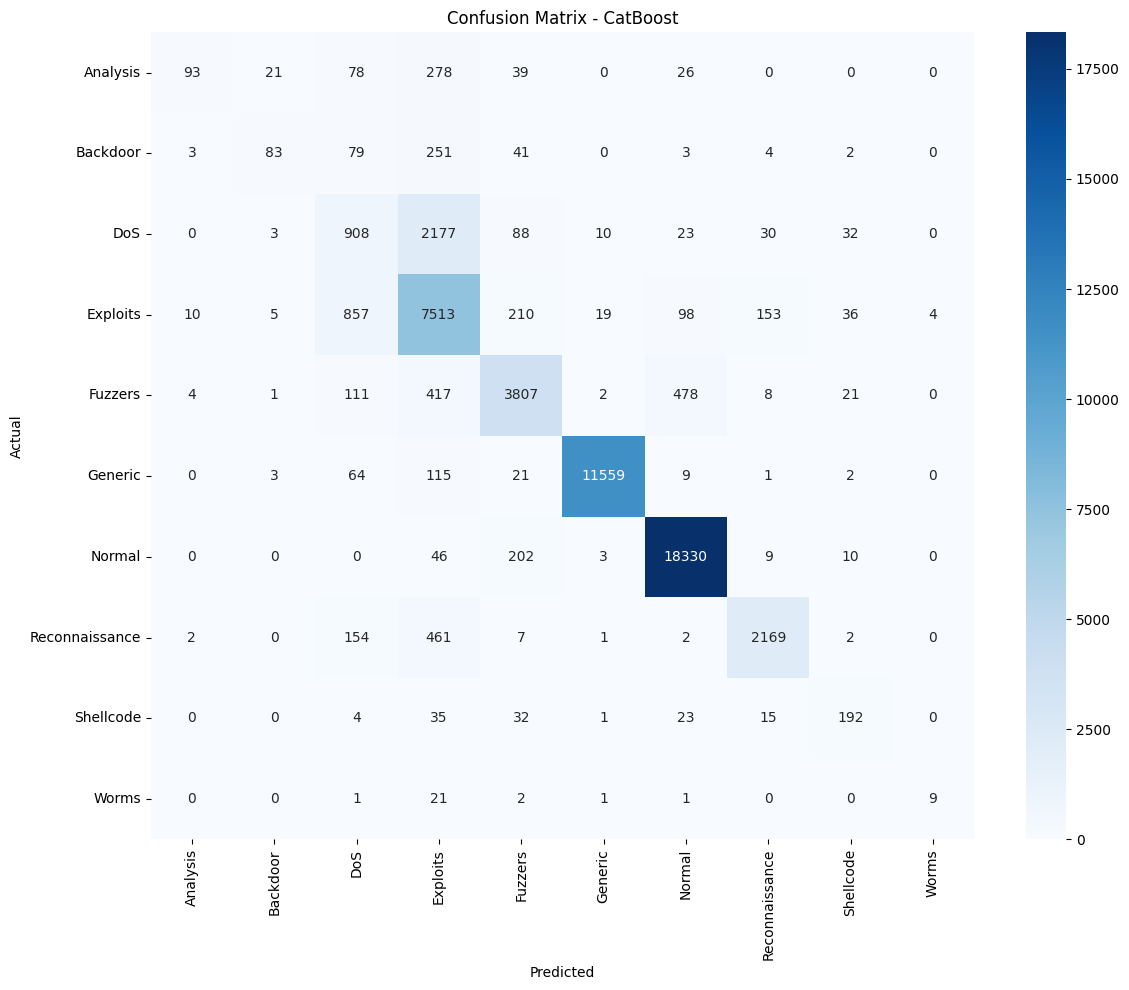


Training and Evaluating: AdaBoost
Classification Report:
                precision    recall  f1-score   support

      Analysis     0.0536    0.2841    0.0902       535
      Backdoor     0.0062    0.1953    0.0121       466
           DoS     0.3333    0.0670    0.1115      3271
      Exploits     0.2129    0.1003    0.1363      8905
       Fuzzers     0.1186    0.0565    0.0765      4849
       Generic     0.9229    0.8927    0.9076     11774
        Normal     0.6544    0.3697    0.4725     18600
Reconnaissance     0.5268    0.6465    0.5806      2798
     Shellcode     0.6336    0.2748    0.3834       302
         Worms     0.0088    0.3714    0.0173        35

      accuracy                         0.4060     51535
     macro avg     0.3471    0.3258    0.2788     51535
  weighted avg     0.5491    0.4060    0.4505     51535



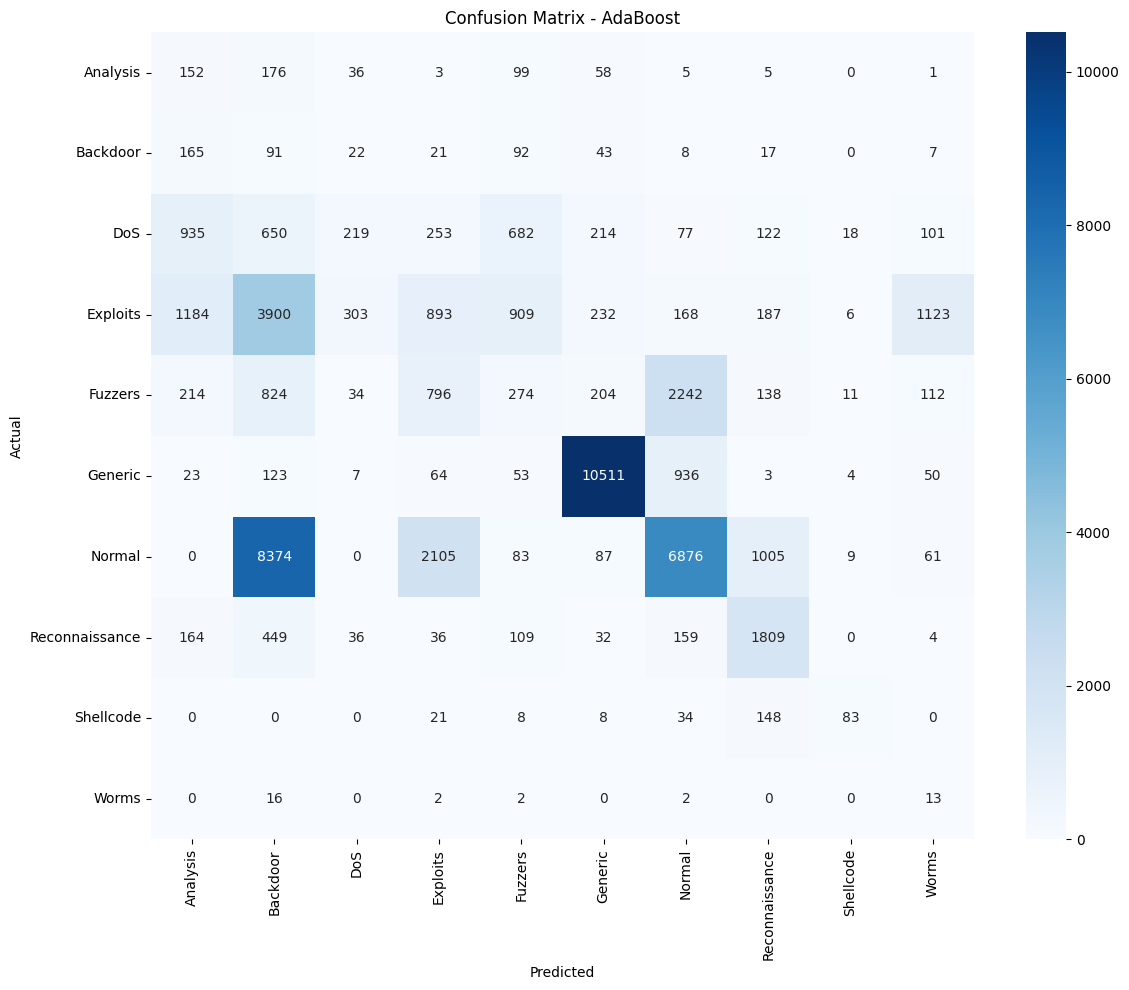


Training and Evaluating: ExtraTrees
Classification Report:
                precision    recall  f1-score   support

      Analysis     0.2348    0.1738    0.1998       535
      Backdoor     0.1504    0.1352    0.1424       466
           DoS     0.4021    0.3617    0.3808      3271
      Exploits     0.7321    0.7926    0.7611      8905
       Fuzzers     0.8010    0.7573    0.7785      4849
       Generic     0.9954    0.9779    0.9866     11774
        Normal     0.9541    0.9738    0.9638     18600
Reconnaissance     0.7882    0.7673    0.7776      2798
     Shellcode     0.6415    0.5629    0.5996       302
         Worms     0.6429    0.2571    0.3673        35

      accuracy                         0.8542     51535
     macro avg     0.6343    0.5760    0.5958     51535
  weighted avg     0.8500    0.8542    0.8516     51535



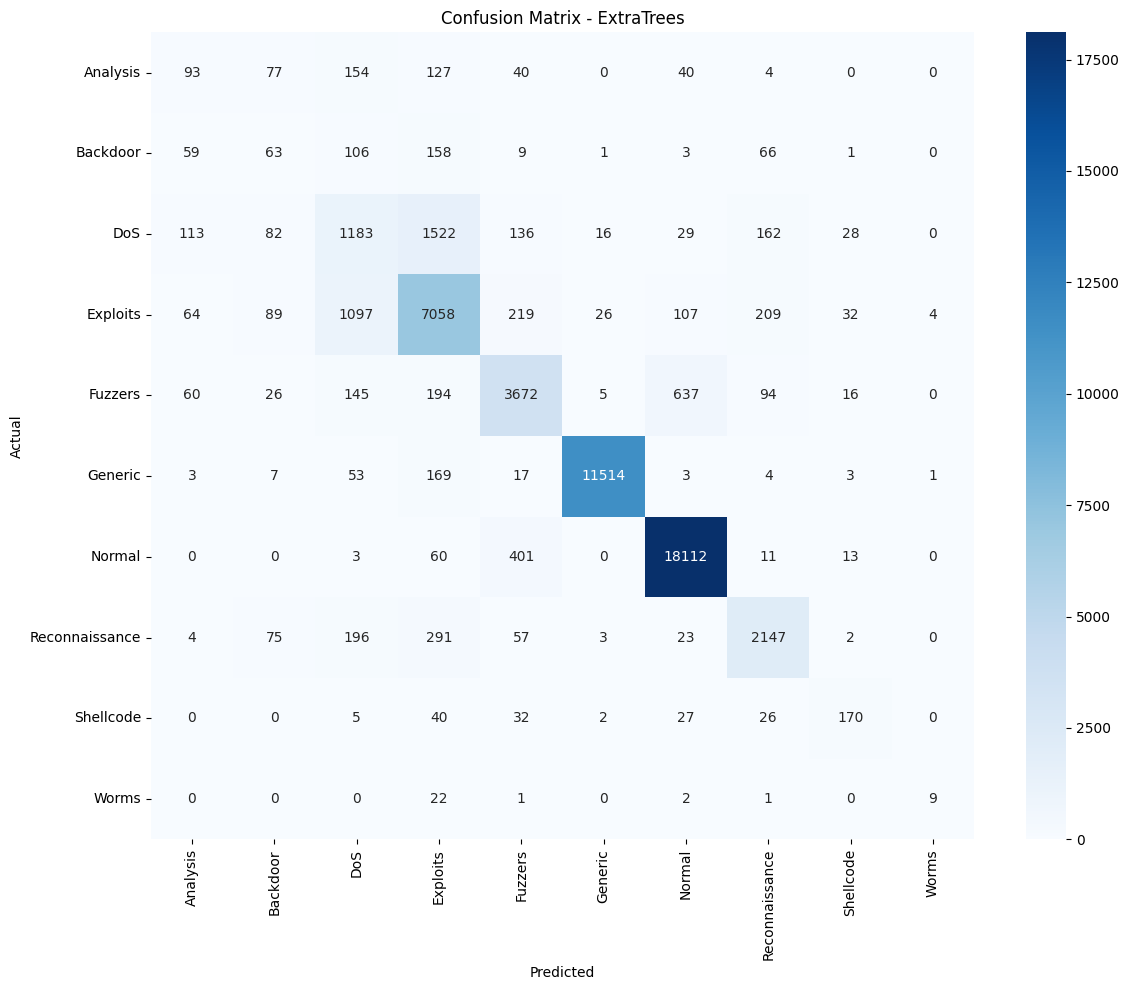


===== Ensemble Model Performance Comparison =====
     Model  Accuracy  Precision   Recall  F1-Score
   XGBoost  0.876104   0.757711 0.620964  0.651031
  CatBoost  0.866654   0.767668 0.589365  0.628011
ExtraTrees  0.854196   0.634252 0.575962  0.595769
  LightGBM  0.852256   0.596845 0.566720  0.573068
  AdaBoost  0.405957   0.347117 0.325833  0.278783


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier

# Load dataset
path_train = "../../Data/unsw-nb2015/UNSW-NB15 - CSV Files/a part of training and testing set/UNSW_NB15_training-set.csv"
path_test = "../../Data/unsw-nb2015/UNSW-NB15 - CSV Files/a part of training and testing set/UNSW_NB15_testing-set.csv"

df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)
df = pd.concat([df_train, df_test], ignore_index=True)

# Encode categorical columns
categorical_cols = ['proto', 'service', 'state']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Encode target
le_target = LabelEncoder()
df['attack_cat'] = le_target.fit_transform(df['attack_cat'].astype(str))

# Prepare features and target
X = df.drop(columns=['attack_cat', 'label'])
y = df['attack_cat']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Define models
models = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "ExtraTrees": ExtraTreesClassifier(random_state=42)
}

results = []

for name, model in models.items():
    print(f"\nTraining and Evaluating: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_test_named = le_target.inverse_transform(y_test)
    y_pred_named = le_target.inverse_transform(y_pred)

    acc = accuracy_score(y_test_named, y_pred_named)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test_named, y_pred_named, average='macro')

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

    print("Classification Report:")
    print(classification_report(y_test_named, y_pred_named, digits=4))

    cm = confusion_matrix(y_test_named, y_pred_named, labels=le_target.classes_)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_target.classes_, yticklabels=le_target.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# Display comparison table
results_df = pd.DataFrame(results)
print("\n===== Ensemble Model Performance Comparison =====")
print(results_df.sort_values(by='Accuracy', ascending=False).to_string(index=False))

# Optional: save table to CSV
results_df.to_csv("ensemble_model_performance.csv", index=False)
